In [32]:
# 预先下载好的歌词文件
import os
os.listdir("./")

['.ipynb_checkpoints',
 'Believe.txt',
 'one_piece.ipynb',
 'WE ARE.txt',
 '一路顺风.txt',
 '向著阳光.txt',
 '寻找风.txt',
 '崭新的世界.txt',
 '心之航海图.txt']

In [33]:
def read_content(content_path):
    '''
    读取目录下的所有文件并合并成一个内容块返回
    '''
    
    # 初始化内容为空
    content = ''
    
    # 使用os模块的listdir函数枚举文件夹下所有文件
    for f in os.listdir(content_path):

        
        # 拼接文件完整路径
        file_fullpath = os.path.join(content_path, f)
        
        # 判断是否是文件
        if os.path.isfile(file_fullpath): 
            print('loading {}'.format(file_fullpath))
            # 将文件内容进行拼接
            content += open(file_fullpath, 'r',encoding='gb18030', errors='ignore').read()
            # 每首歌词之间用换行符分隔
            content += '\n'
    print('done loading')
    return content

In [34]:
# 读取文件夹内容
content = read_content('./')
print('\n显示内容的前面部分...\n')
print(content[:99])

loading ./Believe.txt
loading ./one_piece.ipynb
loading ./WE ARE.txt
loading ./一路顺风.txt
loading ./向著阳光.txt
loading ./寻找风.txt
loading ./崭新的世界.txt
loading ./心之航海图.txt
done loading

显示内容的前面部分...

只相信未来 谁在乎旁人的冷嘲热讽 
飞扬的热情让你如此与众不同 
如此眩目 不愿错过 
不知不觉感到的“美学” 
I'm really really stuck on you 
那独一无二的梦的身影


In [35]:
# 使用jieba提取出关键词
import jieba.analyse

# 这里使用jieba的textrank提取出1000个关键词及其比重
result = jieba.analyse.textrank(content, topK=1000, withWeight=True)

# 生成关键词比重字典
keywords = dict()
for i in result:
    keywords[i[0]] = i[1]
print(keywords)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\Shylin\AppData\Local\Temp\jieba.cache
Loading model cost 0.979 seconds.
Prefix dict has been built succesfully.


{'热情': 1.0, '世界': 0.9396331374365878, '时候': 0.9075936642334467, '未知': 0.9026624741990736, '不会': 0.7241730747273591, '没有': 0.7158575580827506, '追寻': 0.7018951482284906, '梦想': 0.649327944343478, '泪水': 0.6388572581995957, '旅途': 0.6192923258030191, '时间': 0.6142257333251546, '门扉': 0.6044744504999247, '走向': 0.5924770303152125, '前进': 0.555887442163458, '东西': 0.5524638613969001, '坚强': 0.5345077300502666, '旅程': 0.5323624078633389, '光芒': 0.5141534384324862, '同伴': 0.4933529986812247, '太阳': 0.4921048384025165, '开始': 0.4920109590805848, '变得': 0.4887975344124276, '问题': 0.46849761225718956, '通向': 0.46849761225718956, '相信': 0.4675438840080273, '大家': 0.4662182396211479, '孤立': 0.4662182396211479, '目的地': 0.46589881119335436, '信号': 0.4639388669851065, '朝向': 0.46385417633338466, '地图': 0.45777672056583085, '绝望': 0.45332918668785427, '追逐': 0.4239932530872868, '抓住': 0.4239932530872868, '事情': 0.4178225215195001, '旋律': 0.4166393287610155, '错过': 0.4153476854990668, '还有': 0.4149012493813602, '想象': 0.4137816013830

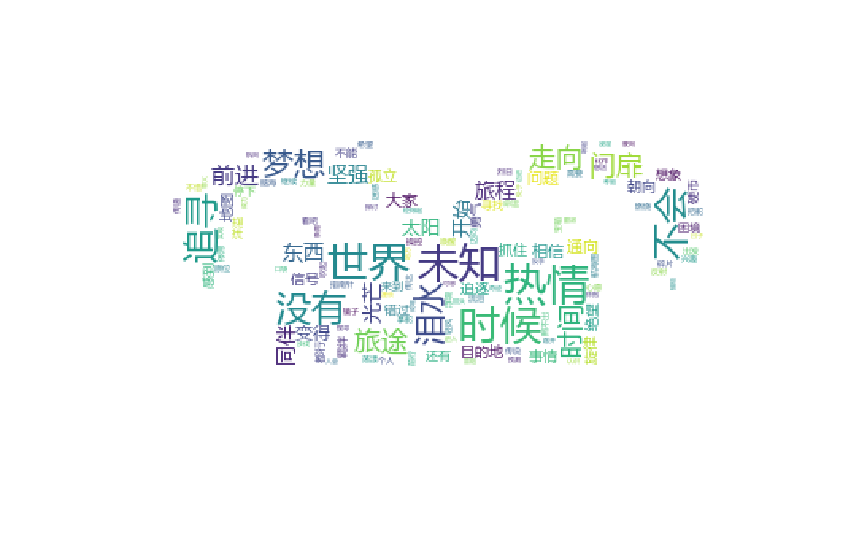

In [42]:
from PIL import Image, ImageSequence
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator

# 1. 打开词云背景图，并向量化处理
background_image = np.array(Image.open('./one_piece2.png'))
    
# 2. 处理词云对象
wc = WordCloud(
    # 使用的字体文件
    font_path = "‪C:\Windows\Fonts\msyh.ttc", # font_path = "/Libray/Fonts/"
    # 设置词云图片的背景颜色
    background_color = "white",
    # 设置词云图片最多可以显示的文字数量
    max_words = 200,
    # 设置词云图片最大的字体大小
    max_font_size = 100,
    # 设置词云图片的背景图
    mask = background_image
)

 # 3. 加载词频数据（类字典对象）
wc.generate_from_frequencies(keywords)
    
# 4. 通过混淆矩阵 绘制词云图片
plt.figure(figsize=(10.24, 7.68), dpi=100)

# 关闭刻度显示
plt.axis("off")
plt.imshow(wc)

# 5. 输出词云图片
wc.to_file("wordcloud2.png")   # 保存的是词云图片
plt.show()